<a href="https://colab.research.google.com/github/jay619/Kaggle-Competitions/blob/dev-digit/2-DigitRecognizer/src/digitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

<h3> Loading the training and testing data <h3>

In [8]:
train = pd.read_csv('https://raw.githubusercontent.com/jay619/Kaggle-Competitions/main/2-DigitRecognizer/digit-recognizer/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/jay619/Kaggle-Competitions/main/2-DigitRecognizer/digit-recognizer/test.csv')

labels = train.iloc[:, 0]
train = train.iloc[:, 1:].to_numpy()
test = test.to_numpy()

<h3> About the data: </h3>

* Training set consists of 42k images with 785 columns.
* The first column is the label for the image
* Each image is 784 pixels or 28x28
* The testing data set contains 28k images with 784 columns
* Problem Statement: Build a model to predict the labels of the test images
* Each image has pixels between 0 - 255

In [9]:
print('Shape of train data: ', train.shape)
print('Shape of test data: ', test.shape)

Shape of train data:  (42000, 784)
Shape of test data:  (28000, 784)


<h3> Printing some images from training set along with their labels</h3>

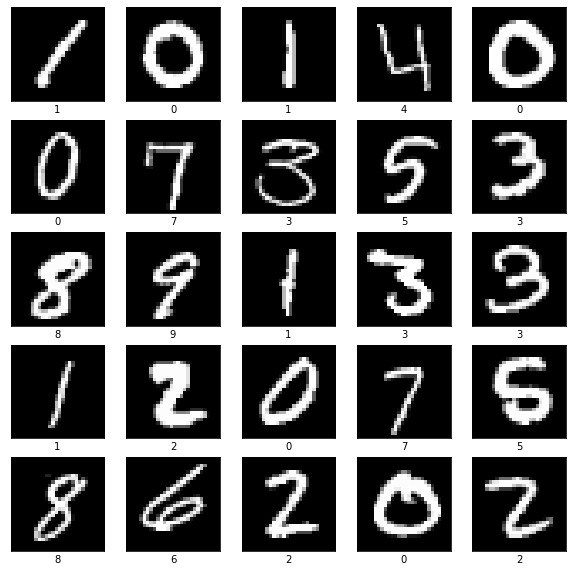

In [10]:
train_images = train / 255.
test_images = test / 255.

plt.figure(figsize=(10,10))
for i in range(25):
  x = np.reshape(train_images[i, :], (28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap='gray')
  plt.xlabel(labels[i])
plt.show()


train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

<h3> Covolutional Neural Network </h3>

* Using CNN to build the model and this will be used to predict the images
* Reference the CNN tutorial on tensorflow

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='linear', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='linear'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='linear'))
model.add(layers.Dense(10))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                51232     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [13]:
history = model.fit(train_images, labels, epochs=5, validation_data=(train_images, labels))

Epoch 1/5
1313/1313 [==============================] - 48s 36ms/step - loss: 0.1745 - accuracy: 0.9471 - val_loss: 0.0714 - val_accuracy: 0.9771
Epoch 2/5
1313/1313 [==============================] - 44s 34ms/step - loss: 0.0651 - accuracy: 0.9802 - val_loss: 0.0447 - val_accuracy: 0.9860
Epoch 3/5
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0396 - val_accuracy: 0.9875
Epoch 4/5
1313/1313 [==============================] - 44s 34ms/step - loss: 0.0424 - accuracy: 0.9865 - val_loss: 0.0278 - val_accuracy: 0.9907
Epoch 5/5
1313/1313 [==============================] - 44s 33ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0282 - val_accuracy: 0.9904
